In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import calendar
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [3]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)

# Stats per hour per day of week

In [4]:
stats = dict()
for i in range(7):
    temp = showings.loc[showings.dayofweek == i, ('hour', 'coverage')]
    stats[calendar.day_name[i]] = dict()
    for j in range(24):
        time = '0' + str(j) + ':00-0' + str(j) + ':59' if j<10 else str(j) + ':00-' + str(j) + ':59'
        stats[calendar.day_name[i]][time] = temp.loc[temp.hour == j, 'coverage']

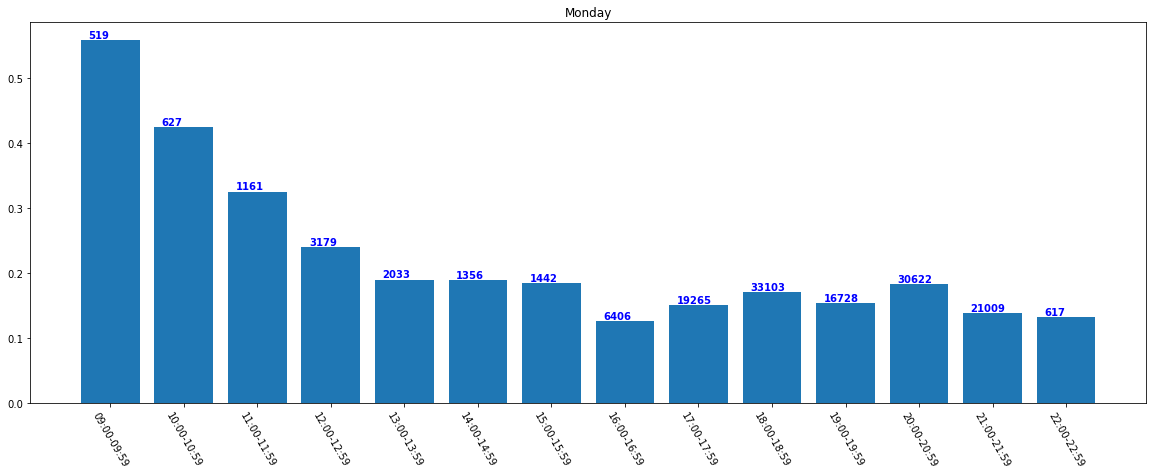

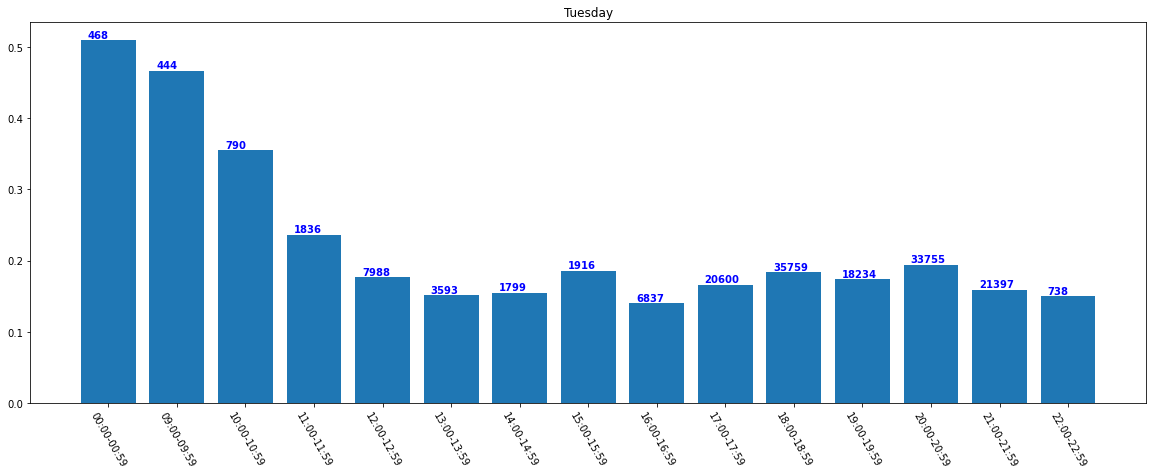

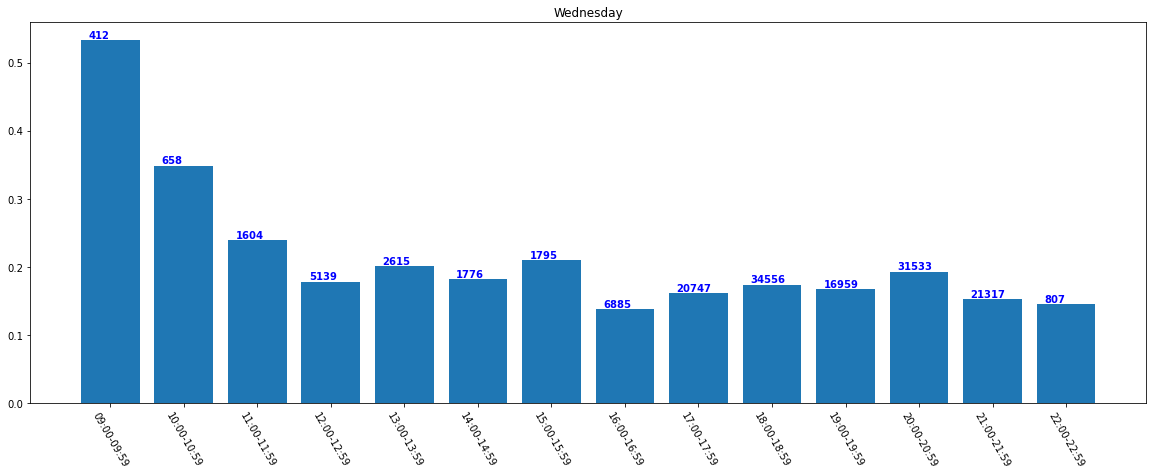

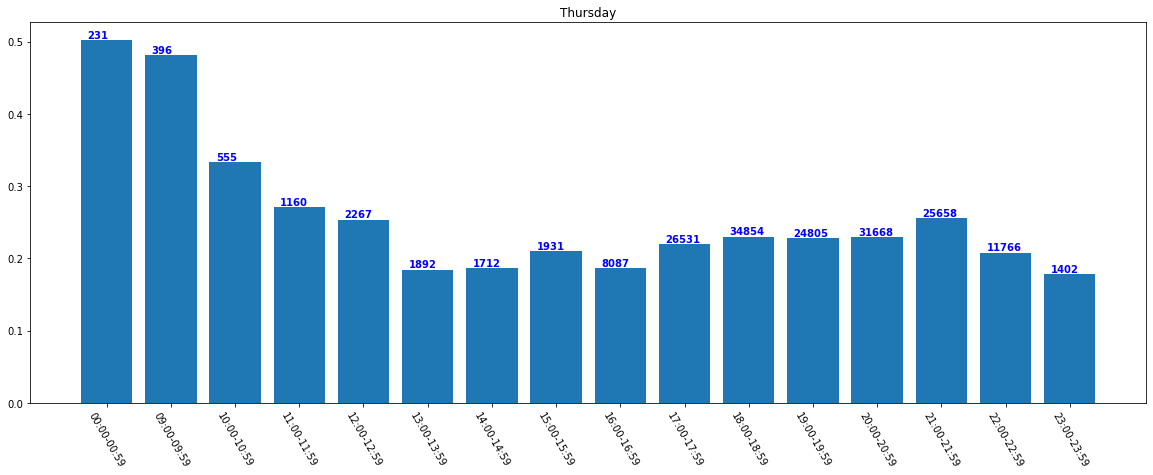

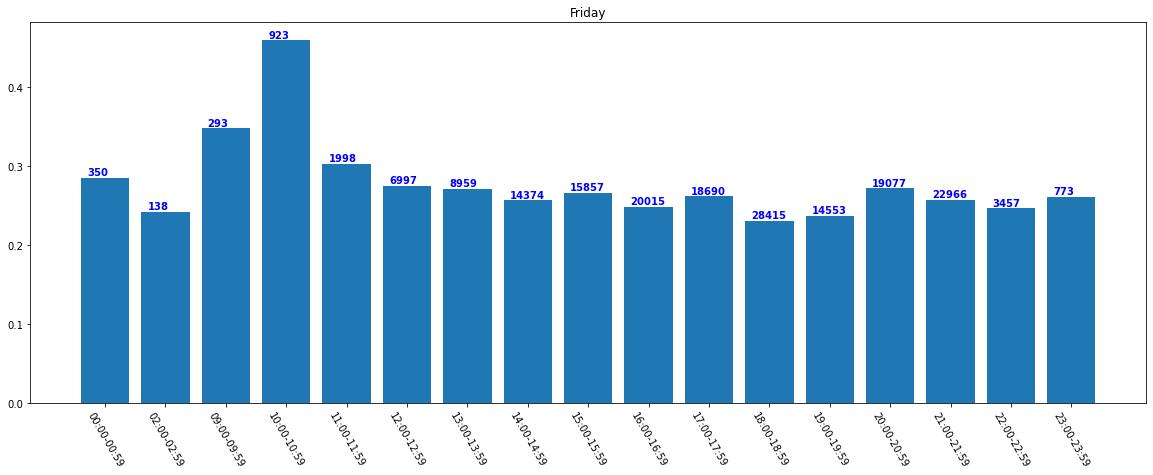

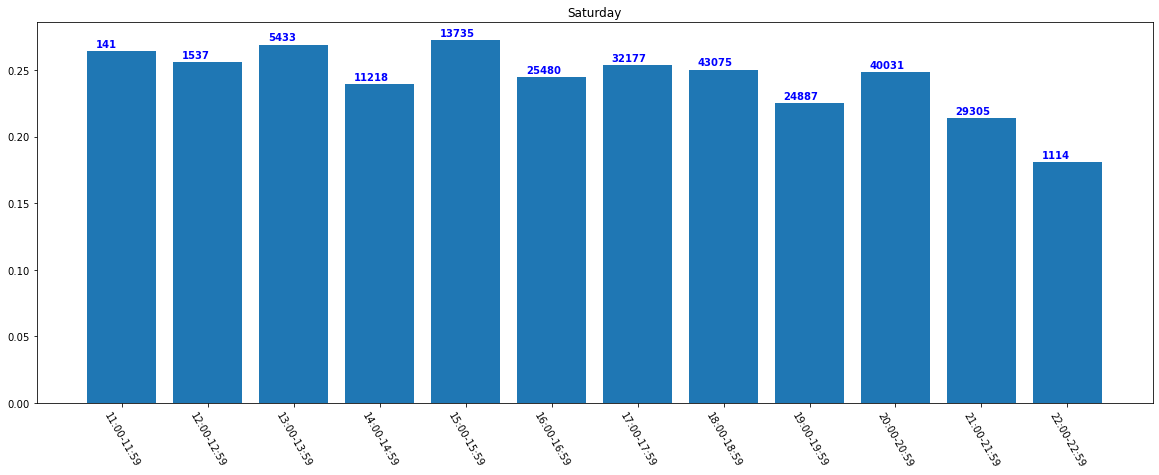

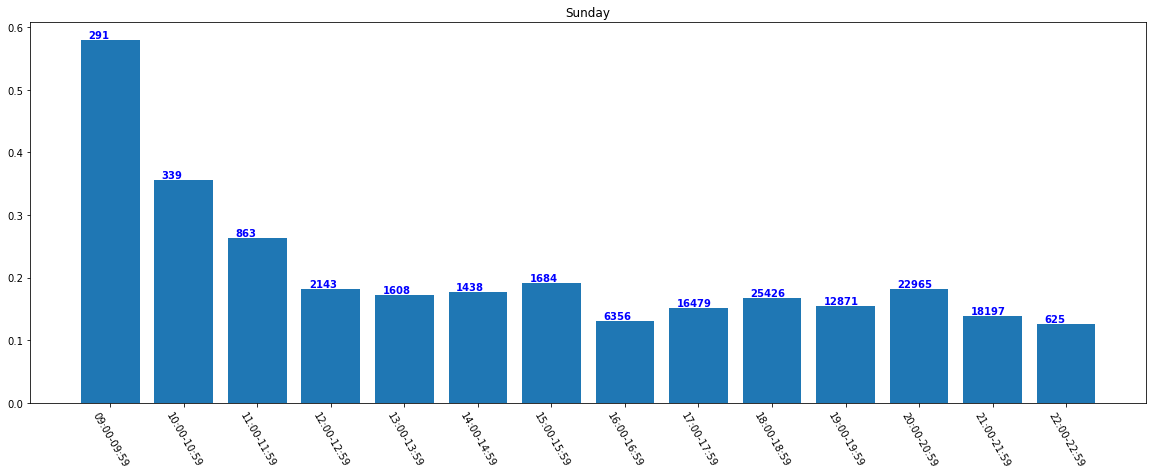

In [5]:
for day in stats:
    bar_plot(stats[day], title=day)

## Coverage by hour of day per day of week, regular opening hours

In [6]:
stats_prime = dict()
for i in range(7):
    temp = showings.loc[showings.dayofweek == i, ('hour', 'coverage')]
    stats_prime[calendar.day_name[i]] = dict()
    for j in range(12, 23):
        time = '0' + str(j) + ':00-0' + str(j) + ':59' if j<10 else str(j) + ':00-' + str(j) + ':59'
        stats_prime[calendar.day_name[i]][time] = temp.loc[temp.hour == j, 'coverage']

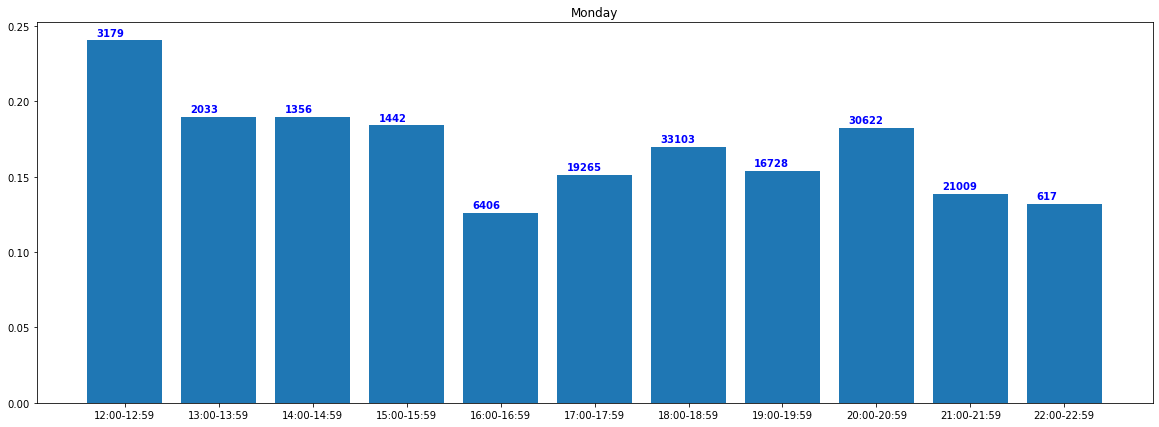

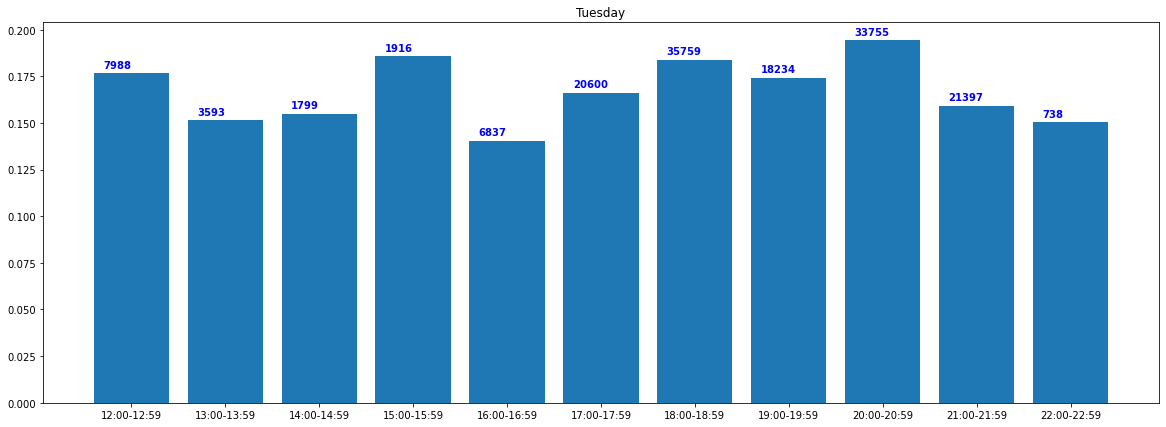

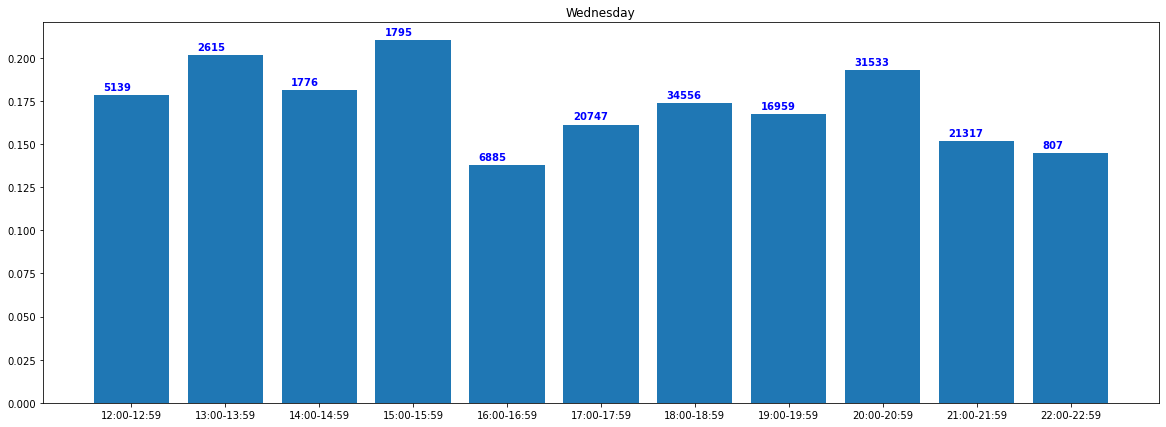

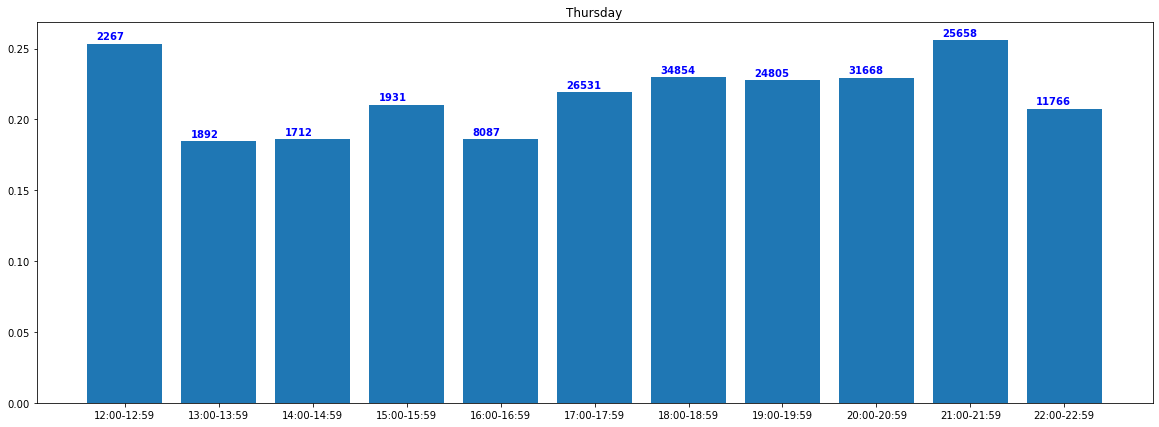

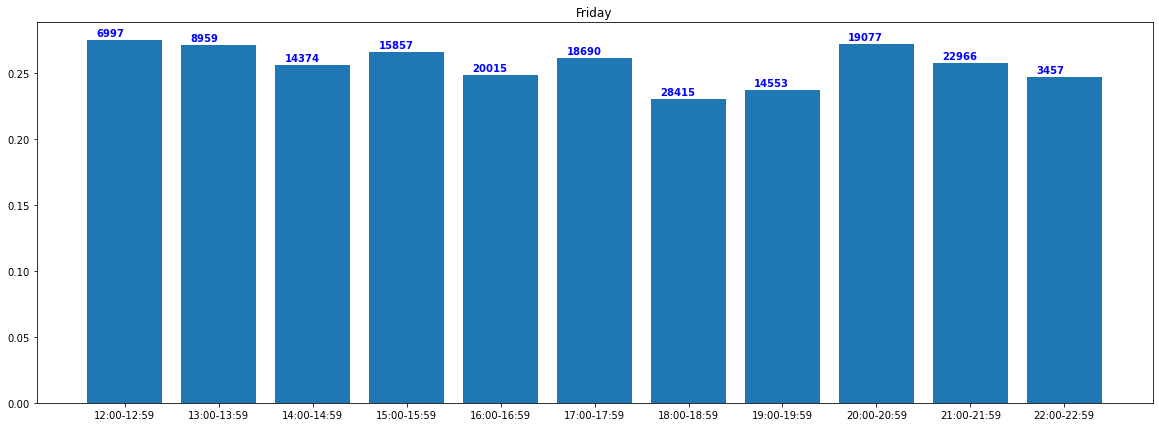

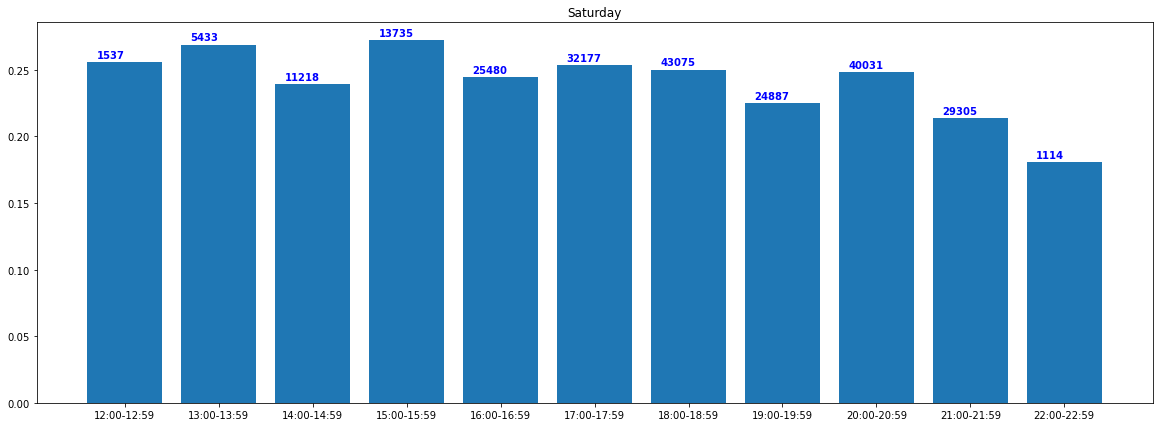

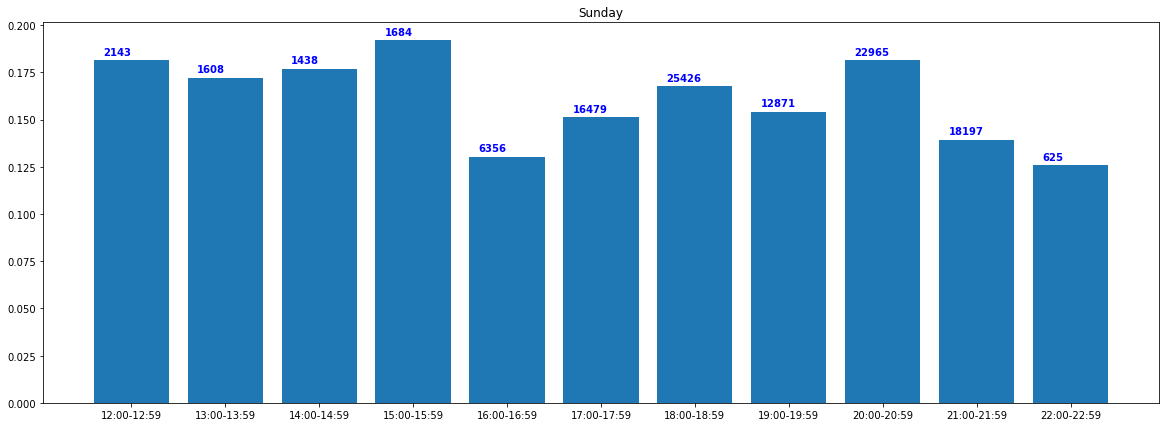

In [7]:
for day in stats_prime:
    bar_plot(stats_prime[day], title=day, file_name='hour_per_day_'+day+'_prime', r=0)

## Coverage by hour of day per day of week, outside opening hours

In [8]:
stats_outlier = dict()
for i in range(7):
    temp = showings.loc[showings.dayofweek == i, ('hour', 'coverage')]
    stats_outlier[calendar.day_name[i]] = dict()
    for j in list(range(12)) + [23]:
        time = '0' + str(j) + ':00-0' + str(j) + ':59' if j<10 else str(j) + ':00-' + str(j) + ':59'
        stats_outlier[calendar.day_name[i]][time] = temp.loc[temp.hour == j, 'coverage']

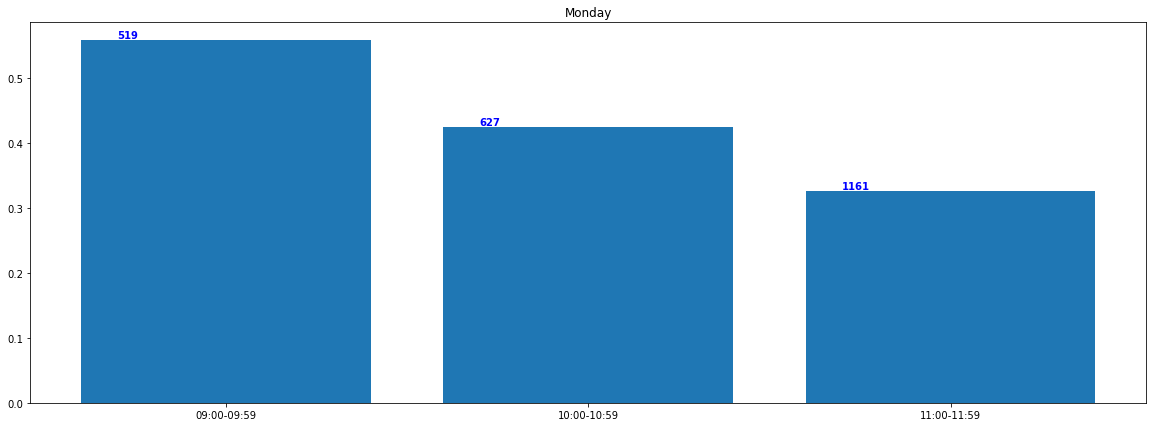

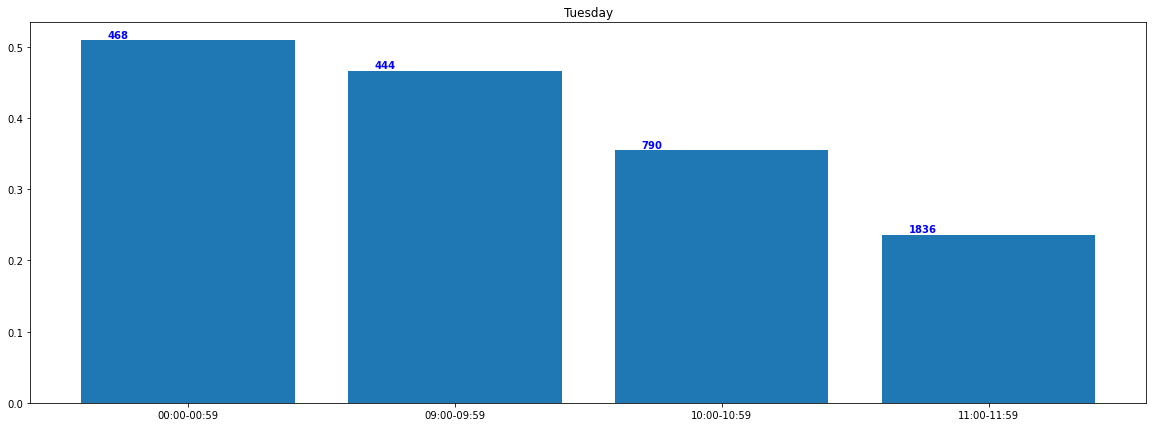

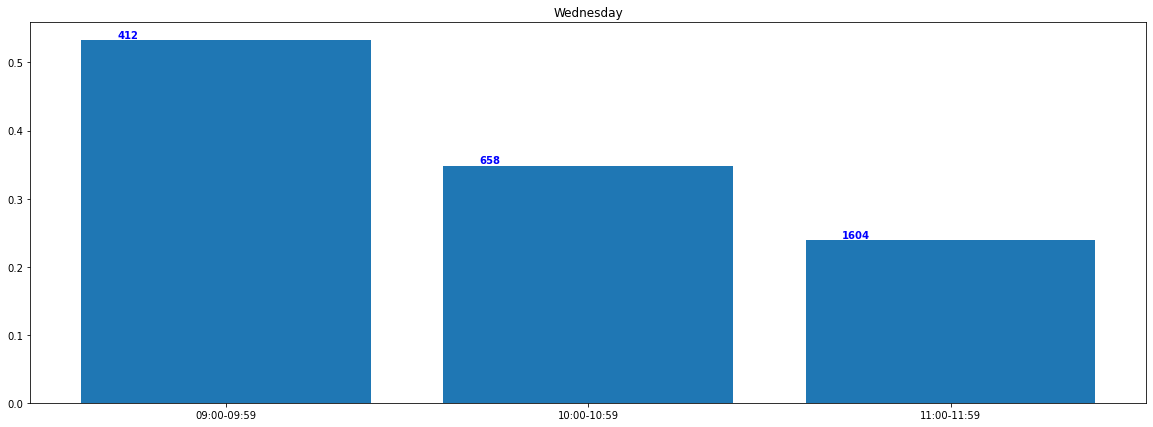

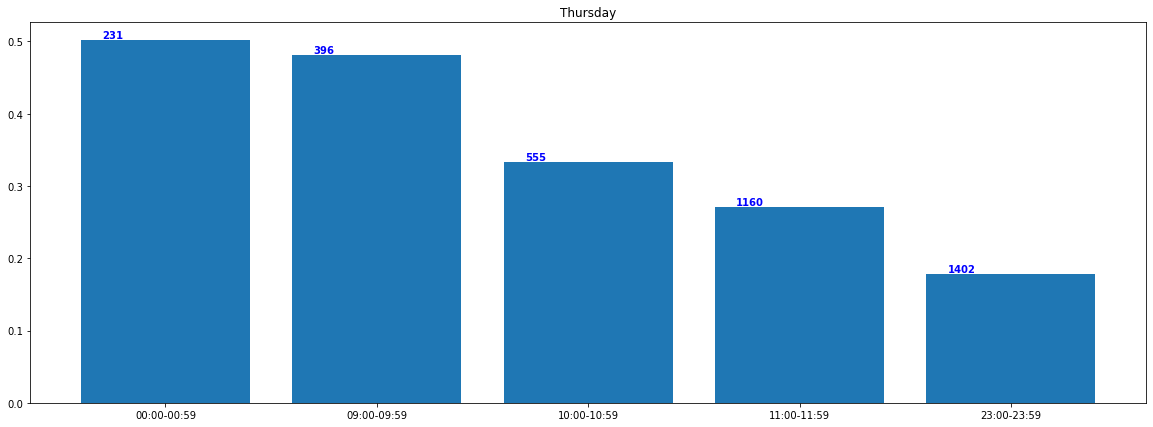

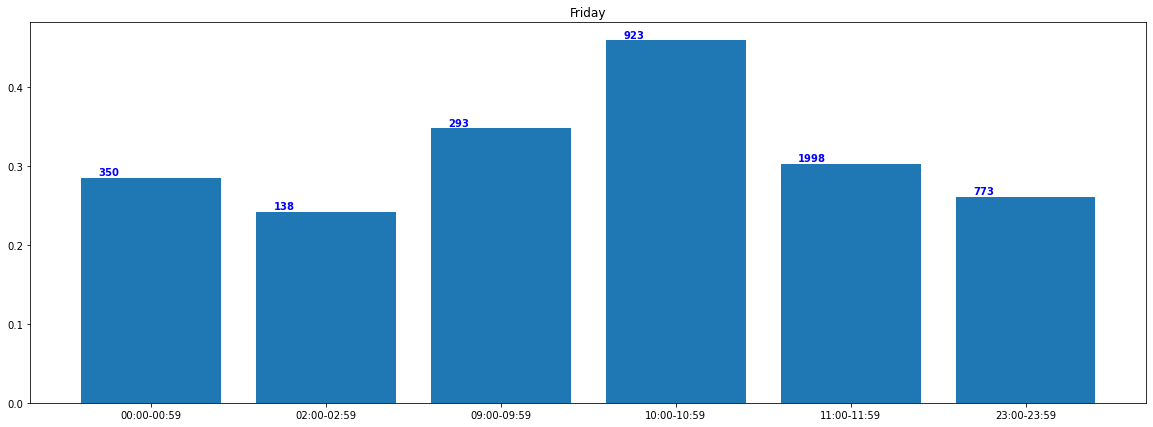

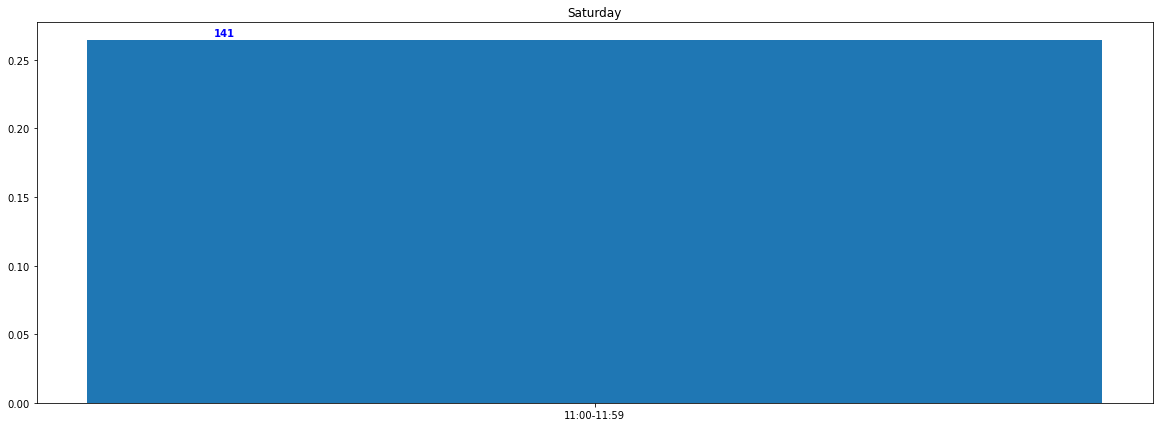

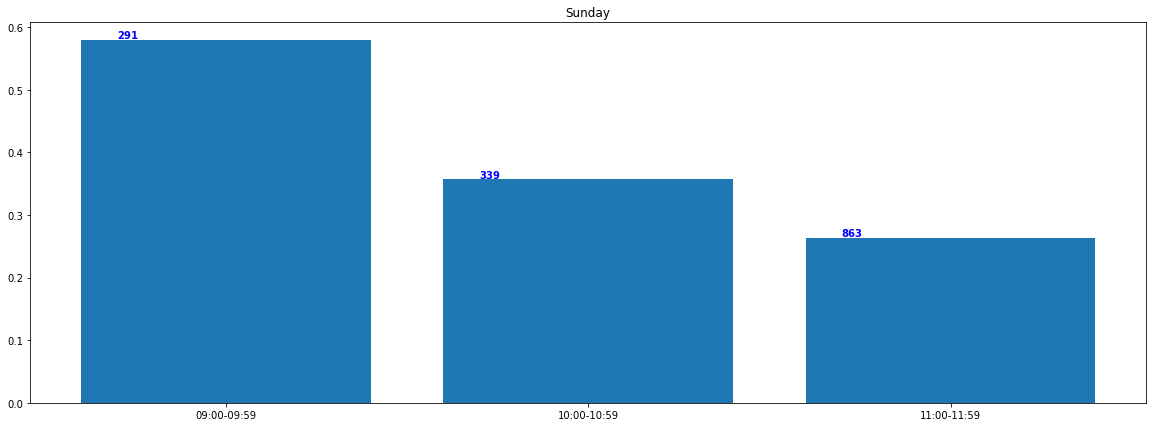

In [9]:
for day in stats_outlier:
    bar_plot(stats_outlier[day], title=day, file_name='hour_per_day_'+day+'_outlier', r=0)